<a href="https://colab.research.google.com/github/semant/MachineLearning/blob/master/Transfer_Learning_CNN_Mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Use of Transfer Learning Saves 76% Training Time for Image Recognition in Deep Learning

> Semant Jain, PhD semant@gmail.com

### Summary
> Deep learning models enable their reuse on related problems. However, training millions of weights in deep neural networks can take an enormous time. So, weights pre-trained on a similar problem can be reused partially or wholly in the problem of interest. Here, large public datasets such as ImageNet, can be used to train the model. Then, the much smaller private dataset can be used to train the classifer in the problem of interest.

> To demonstrate the machine learning methodology, in this project, a Convolutional Neural Network (CNN) was created from scratch. Second, it was trained on hand written digits (0 to 4) present in the public dataset Mnist. To demonstrate the transfer learning methodology, a few classifier layers were added on top of the trained CNN. This was trained on the remaining digits (5 to 9) from Mnist. For training 10 epochs, while the original model took 156.87 seconds, the transfer learning took 37.14 seconds. So, transfer learning resulted in a 76% reduction in training time.


### Libraries
+ Datetime
+ Keras
+ Matplotlib
+ Numpy
+ Pandas
+ Time

# 1. Preprocessing

### Importing libraries

In [0]:
import datetime
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
import time


from keras import applications
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten, Activation, Dropout, MaxPool2D
from keras.utils import np_utils

### Importing data

In [0]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
print(x_train.shape, y_train.shape)
print(x_test.shape,  y_test.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


### Splitting data: Train / test
+ Training: Digits 0 to 4
+ Transfer learning: Digits 5 to 9

In [0]:
pt_x_train = []
pt_y_train = []
pt_x_test  = []
pt_y_test  = [] 


tl_x_train = []
tl_y_train = []
tl_x_test  = []
tl_y_test  = [] 

m = 20000
for i in range(m):
    if y_train[i] < 5:
        pt_x_train.append(x_train[i] / 255)
        pt_y_train.append(y_train[i])
    else:
        tl_x_train.append(x_train[i] / 255)
        tl_y_train.append(y_train[i])
        

m2 = 10000
for i in range(m2):
    if y_test[i] < 5:
        pt_x_test.append(x_test[i] / 255)
        pt_y_test.append(y_test[i])
    else:
        tl_x_test.append(x_test[i] / 255)
        tl_y_test.append(y_test[i])

In [0]:
pt_x_train = np.asarray(pt_x_train).reshape(-1, 28, 28, 1)
pt_x_test = np.asarray(pt_x_test).reshape(-1, 28, 28, 1)

pt_y_train = np_utils.to_categorical(np.asarray(pt_y_train))
pt_y_test  = np_utils.to_categorical(np.asarray(pt_y_test))

tl_x_train = np.asarray(tl_x_train).reshape(-1, 28, 28, 1)
tl_x_test  = np.asarray(tl_x_test).reshape(-1, 28, 28, 1)

tl_y_train = np_utils.to_categorical(np.asarray(tl_y_train))
tl_y_test  = np_utils.to_categorical(np.asarray(tl_y_test))

In [0]:
print(pt_x_train.shape, pt_y_train.shape)
print(pt_x_test.shape, pt_y_test.shape)

print(tl_x_train.shape, tl_y_train.shape)
print(tl_x_test.shape, tl_y_test.shape)

(10225, 28, 28, 1) (10225, 5)
(5139, 28, 28, 1) (5139, 5)
(9775, 28, 28, 1) (9775, 10)
(4861, 28, 28, 1) (4861, 10)


# 2. Model: CNN from scratch

### Architecture: For digits 0 to 4

In [0]:
model = Sequential()
model.add(Conv2D(32, 5, input_shape = (28, 28, 1), activation = "relu"))
model.add(Conv2D(16, 5, activation = "relu"))
model.add(MaxPool2D(pool_size = (2,2)))

model.add(Conv2D(8, 3, activation = "relu"))
model.add(Flatten())
model.add(Dropout(0.4))

model.add(Dense(128, activation = "relu"))
model.add(Dense(5, activation = "softmax"))

model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 24, 24, 32)        832       
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 20, 20, 16)        12816     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 10, 10, 16)        0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 8, 8, 8)           1160      
_________________________________________________________________
flatten_4 (Flatten)          (None, 512)               0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_11 (Dense)             (None, 128)              

**Model training: Digits 0 to 4**

In [0]:
model.compile(loss = "categorical_crossentropy",
             optimizer = 'adam',
             metrics = ['accuracy'])

In [0]:
start = datetime.datetime.now()

history1 = model.fit(pt_x_train, pt_y_train, 
         validation_data = (pt_x_test, pt_y_test),
         epochs = 10,
         shuffle = True,
         batch_size = 100,
         verbose = 1)

end = datetime.datetime.now()
time1 = (end - start).total_seconds()
print("Original model | Time to fit: ", time1)

Train on 10225 samples, validate on 5139 samples
Epoch 1/10
10225/10225 [==============================] - 16s 2ms/step - loss: 0.3081 - accuracy: 0.8965 - val_loss: 0.0510 - val_accuracy: 0.9844
Epoch 2/10
10225/10225 [==============================] - 16s 2ms/step - loss: 0.0789 - accuracy: 0.9771 - val_loss: 0.0304 - val_accuracy: 0.9907
Epoch 3/10
10225/10225 [==============================] - 15s 2ms/step - loss: 0.0535 - accuracy: 0.9841 - val_loss: 0.0188 - val_accuracy: 0.9949
Epoch 4/10
10225/10225 [==============================] - 15s 1ms/step - loss: 0.0394 - accuracy: 0.9868 - val_loss: 0.0169 - val_accuracy: 0.9955
Epoch 5/10
10225/10225 [==============================] - 14s 1ms/step - loss: 0.0309 - accuracy: 0.9908 - val_loss: 0.0126 - val_accuracy: 0.9965
Epoch 6/10
10225/10225 [==============================] - 16s 2ms/step - loss: 0.0300 - accuracy: 0.9906 - val_loss: 0.0165 - val_accuracy: 0.9951
Epoch 7/10
10225/10225 [==============================] - 15s 1ms/ste

### Transfer learning

**Freezing initial layers**

In [0]:
for layer in model.layers[:6]:
    layer.trainable = False

# for layer in model.layers:
#     print(layer.trainable)

**Architecture: Transfer Learning**
+ Model for training digits 5 to 9

In [0]:
tl_model = Sequential(model.layers[:6])

tl_model.add(Dense(128, activation = "relu"))
tl_model.add(Dense(10, activation = "softmax"))

tl_model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 24, 24, 32)        832       
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 20, 20, 16)        12816     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 10, 10, 16)        0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 8, 8, 8)           1160      
_________________________________________________________________
flatten_4 (Flatten)          (None, 512)               0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_13 (Dense)             (None, 128)              

In [0]:
tl_model.compile(loss = "categorical_crossentropy",
                optimizer = 'adam',
                metrics = ['accuracy'])

In [0]:
start = datetime.datetime.now()

history2 = tl_model.fit(tl_x_train, tl_y_train,
             validation_data = (tl_x_test, tl_y_test),
            epochs = 10,
             batch_size = 100, # Usually powers of 2. 32 is default
             shuffle = True,
             verbose = 1)

end = datetime.datetime.now()
time2 = (end - start).total_seconds()
print("Transfer Learning | Time to fit: ", time2)

Train on 9775 samples, validate on 4861 samples
Epoch 1/10
9775/9775 [==============================] - 4s 377us/step - loss: 0.3376 - accuracy: 0.8969 - val_loss: 0.0725 - val_accuracy: 0.9792
Epoch 2/10
9775/9775 [==============================] - 3s 325us/step - loss: 0.0885 - accuracy: 0.9730 - val_loss: 0.0511 - val_accuracy: 0.9854
Epoch 3/10
9775/9775 [==============================] - 4s 368us/step - loss: 0.0718 - accuracy: 0.9774 - val_loss: 0.0501 - val_accuracy: 0.9835
Epoch 4/10
9775/9775 [==============================] - 4s 418us/step - loss: 0.0606 - accuracy: 0.9815 - val_loss: 0.0446 - val_accuracy: 0.9870
Epoch 5/10
9775/9775 [==============================] - 5s 509us/step - loss: 0.0537 - accuracy: 0.9825 - val_loss: 0.0366 - val_accuracy: 0.9877
Epoch 6/10
9775/9775 [==============================] - 3s 352us/step - loss: 0.0480 - accuracy: 0.9849 - val_loss: 0.0371 - val_accuracy: 0.9893
Epoch 7/10
9775/9775 [==============================] - 3s 342us/step - loss

### Visualization

**Training loss**

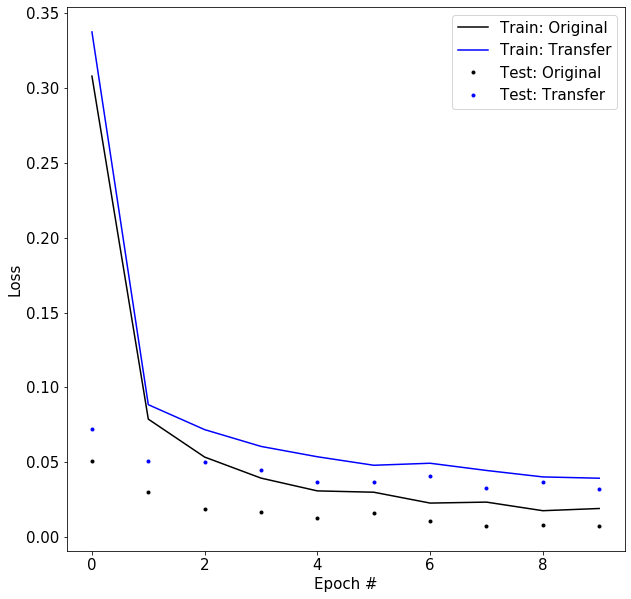

In [0]:
#history2.history.keys()
plt.figure(figsize = (10,10))
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.xlabel("Epoch #", fontsize = 15)
plt.ylabel("Loss", fontsize = 15)
plt.plot(history1.history['loss'], 'k-')
plt.plot(history2.history['loss'], 'b-')
plt.plot(history1.history['val_loss'], 'k.')
plt.plot(history2.history['val_loss'], 'b.')
plt.legend(['Train: Original', 'Train: Transfer', 
            'Test: Original', 'Test: Transfer'], fontsize = 15)
plt.savefig("CE_ML_Project_09_02_LossComparison.jpeg")
plt.show()

**Comparison**

In [0]:
# df1 = pd.DataFrame({'Original': [time1],
#                    'Transfer learning': [time2]},
#                   index=['CNN'])
# print(df1)

# plt.figure(figsize = (10,10))
# df1.plot(kind = 'bar')
# plt.xticks(fontsize = 15, rotation = 0)
# plt.yticks(fontsize = 15)
# #plt.xlabel("Model", fontsize = 15)
# plt.ylabel("Training time (sec)", fontsize = 15)
# plt.show()

Original time to fit: 156.87 seconds and the Transfer learning time to fit: 37.14 seconds
Using transfer learning, training time saved: 76.33 % 



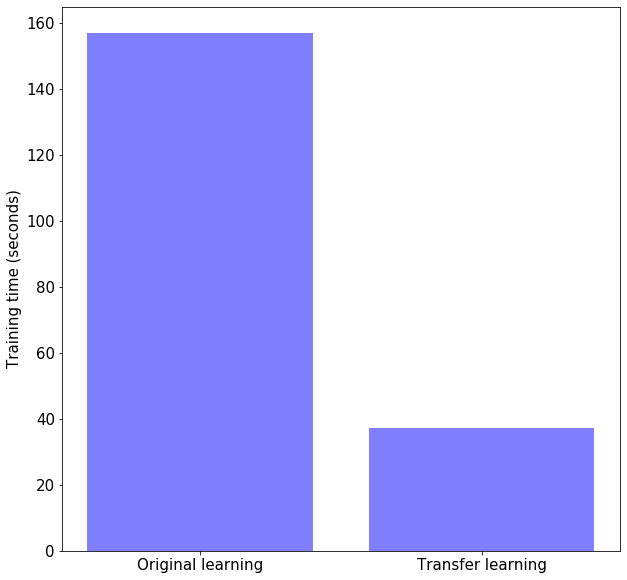

In [0]:
print(f"Original time to fit: {round(time1, 2)} seconds and the Transfer learning time to fit: {round(time2, 2)} seconds")
print(f"Using transfer learning, training time saved: {round((1 - time2/time1)*100,2)} % \n")

objects = ('Original learning', 'Transfer learning')
y_pos = np.arange(len(objects))
performance = [time1, time2]

plt.figure(figsize = (10,10))
plt.bar(y_pos, performance, align='center', alpha=0.5, color = 'b')
plt.xticks(y_pos, objects)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.ylabel('Training time (seconds)', fontsize = 15)
plt.savefig("CE_ML_Project_09_03_TimeComparison.jpeg")
plt.show()